<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%96%91%EC%9E%90%EA%B2%8C%EC%9D%B4%ED%8A%B8%ED%9A%8C%EB%A1%9C_MultiQubit_20231102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-aer

In [105]:
from qiskit import QuantumCircuit
import numpy as np
import math

Controlled-X(NOT) Gate
*   Apply NOT(Pauli-X) on q1 if q0 is 1, do nothing otherwise
*   Also known as (a.k.a.) CNOT, CX gate




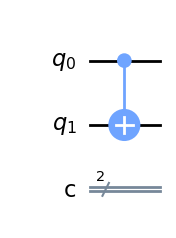

In [113]:
qc = QuantumCircuit(2, 2)
qc.cx(0,1)
qc.draw('mpl')

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


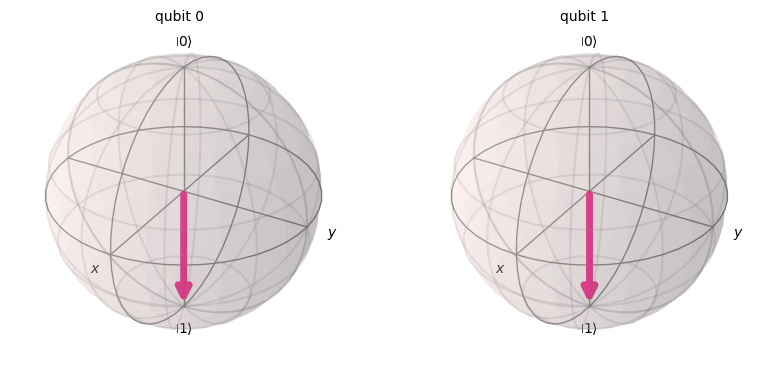

In [115]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

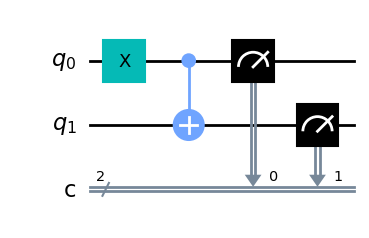

In [117]:
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')

In [135]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

In [142]:
#state = Statevector.from_instruction(qc)
#print(state)
#plot_bloch_multivector(state)

QiskitError: ignored

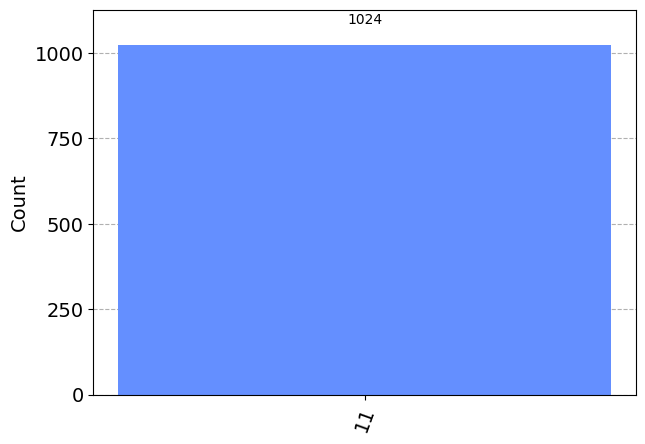

In [136]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

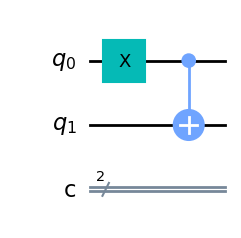

In [137]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)
qc.draw('mpl')

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


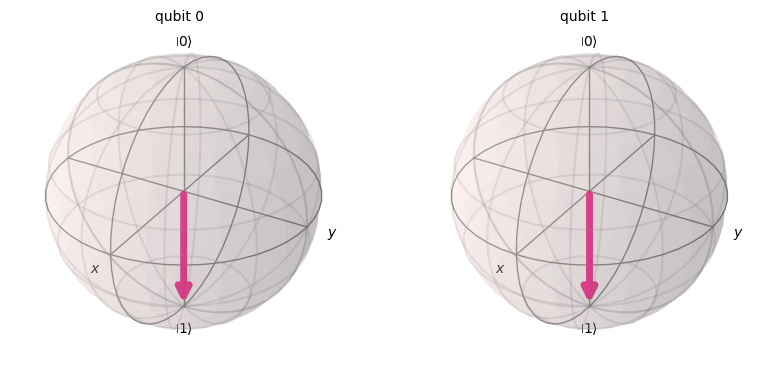

In [138]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

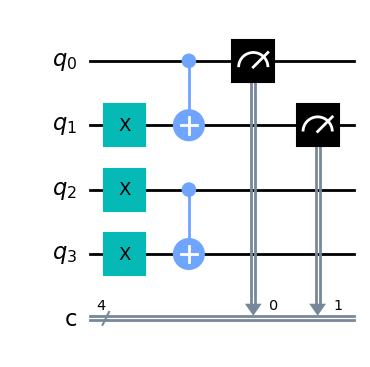

In [148]:
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')

In [140]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1024}


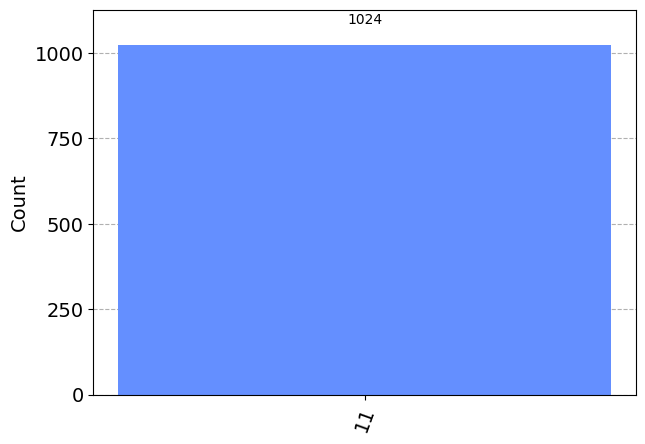

In [141]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

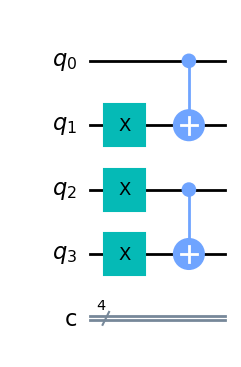

In [159]:
qc = QuantumCircuit(4, 4)
qc.x([1, 2, 3])
qc.cx(0, 1)
qc.cx(2, 3)
qc.draw('mpl')

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


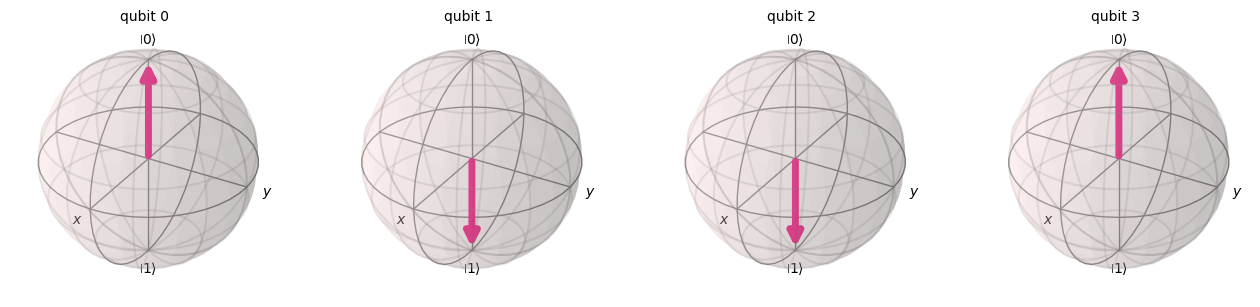

In [160]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

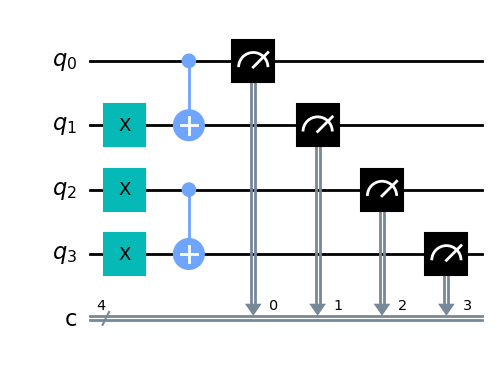

In [161]:
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)
qc.draw('mpl')

In [162]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'0110': 1024}


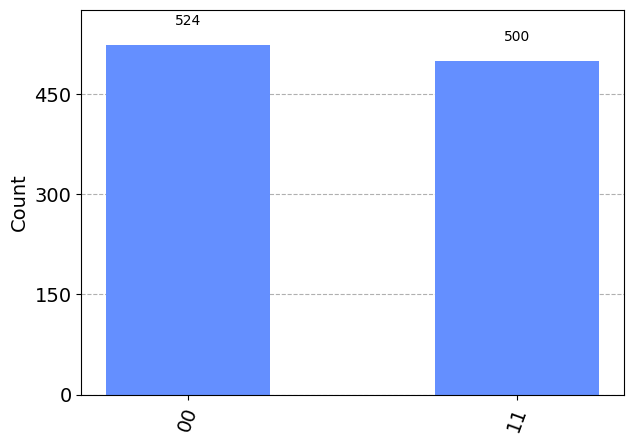

In [173]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

여기까지는 디지털논리회로와 거의 같다.

# **CNOT with Superposition**

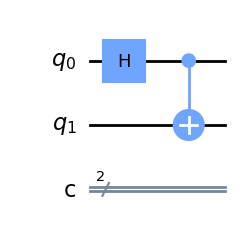

In [168]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
#qc.measure(range(2), range(2))
qc.draw('mpl')

In [182]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

QiskitError: ignored

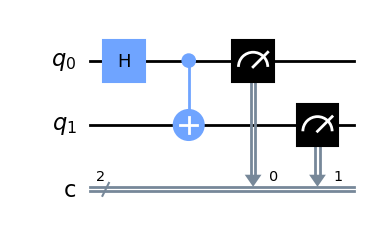

In [171]:
qc.measure(range(2), range(2))
qc.draw('mpl')

In [172]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 500, '00': 524}


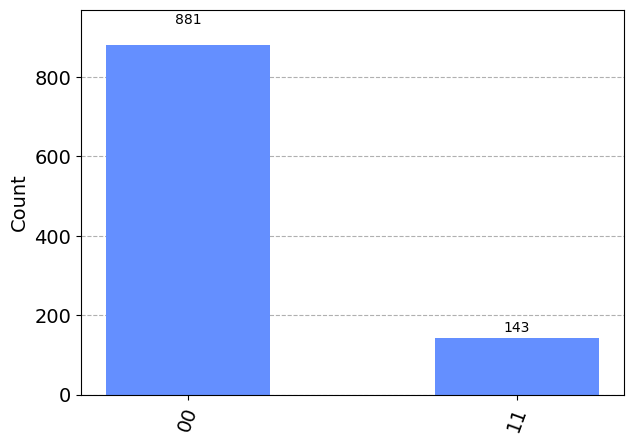

In [177]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

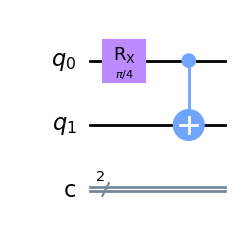

In [183]:
#Hadmard보다 rotation gate를 사용하여 보다 기울여진 확률을 알아내자
import math
qc = QuantumCircuit(2, 2)
qc.rx(math.pi/4, 0)
qc.cx(0, 1)
#qc.measure(range(2), range(2))
qc.draw('mpl')

Statevector([0.92387953+0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        -0.38268343j],
            dims=(2, 2))


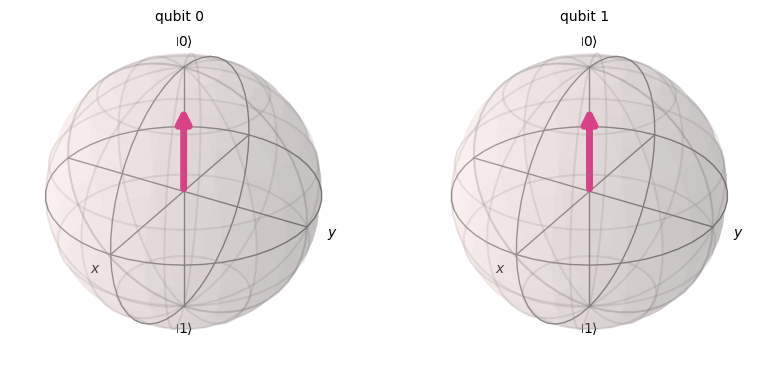

In [184]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

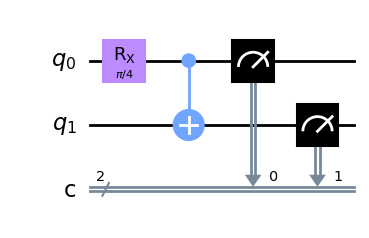

In [185]:
qc.measure(range(2), range(2))
qc.draw('mpl')

{'10': 1024}


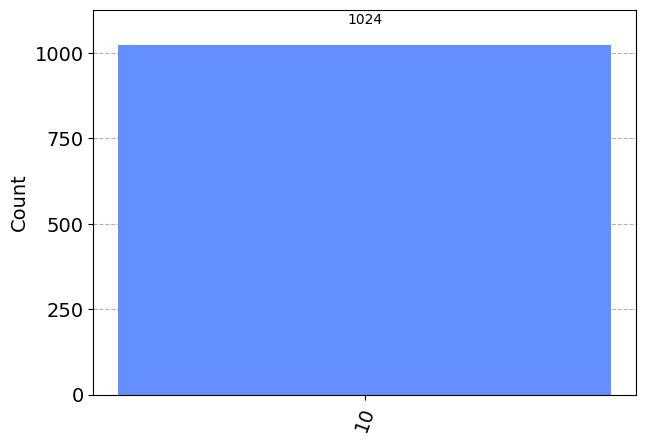

In [188]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

값은 '00', '11'에만 나오지만 확률은 기울어져 있음.

# 출력시 Qubit 표기법:
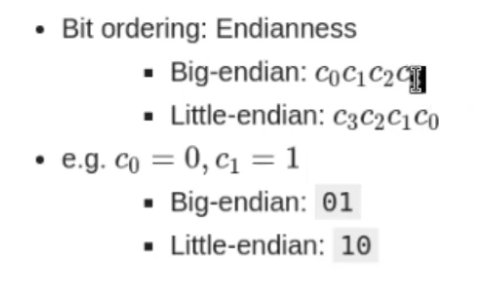

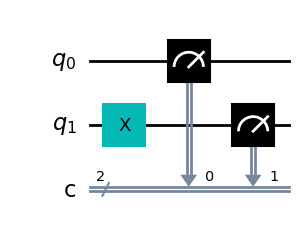

In [187]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.measure(range(2), range(2))
qc.draw('mpl')

{'000': 1024}


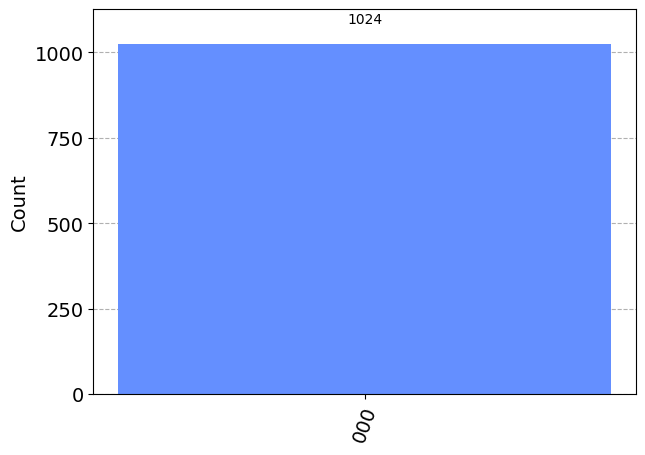

In [191]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

Qiskit, Microsoft QDK와 Q# 은 Little Endian, IonQ는 Big Endian <br>

QDK(Quantum Development Kit)는 양자 컴퓨팅을 위한 개발 도구입니다. QDK는 다양한 양자 컴퓨팅 플랫폼을 지원하며, big endian과 little endian을 모두 지원합니다.

**Big endian**은 숫자의 최상위 바이트가 가장 왼쪽에 오는 방식입니다. 반면에 **little endian**은 숫자의 최상위 바이트가 가장 오른쪽에 오는 방식입니다.

**Big endian을 사용하는 QDK**

* **IBM Qiskit**는 IBM의 양자 컴퓨팅 플랫폼을 지원하는 QDK입니다. IBM Qiskit은 big endian을 기본으로 사용합니다.
* **Microsoft Quantum Development Kit**는 Microsoft의 양자 컴퓨팅 플랫폼을 지원하는 QDK입니다. Microsoft Quantum Development Kit는 big endian을 기본으로 사용합니다.
* **Rigetti Forest SDK**는 Rigetti의 양자 컴퓨팅 플랫폼을 지원하는 QDK입니다. Rigetti Forest SDK는 big endian을 기본으로 사용합니다.

**Little endian을 사용하는 QDK**

* **IonQ Runtime**는 IonQ의 양자 컴퓨팅 플랫폼을 지원하는 QDK입니다. IonQ Runtime은 little endian을 기본으로 사용합니다.
* **Google Cirq**는 Google의 양자 컴퓨팅 플랫폼을 지원하는 QDK입니다. Google Cirq은 little endian을 기본으로 사용합니다.
* **Orquestra**는 다중 양자 컴퓨팅 플랫폼을 지원하는 QDK입니다. Orquestra는 little endian을 기본으로 사용합니다.

**endian을 선택하는 방법**

QDK의 endian을 선택할 때는 다음과 같은 사항을 고려해야 합니다.

* **사용하는 양자 컴퓨팅 플랫폼** : 일부 양자 컴퓨팅 플랫폼은 특정 endian을 사용합니다. 따라서 해당 플랫폼을 사용하는 경우 해당 endian을 사용하는 QDK를 선택해야 합니다.
* **개발하는 알고리즘** : 일부 알고리즘은 특정 endian을 사용하여 구현하는 것이 더 효율적입니다. 따라서 해당 알고리즘을 사용하는 경우 해당 endian을 사용하는 QDK를 선택하는 것이 좋습니다.

**endian을 변경하는 방법**

QDK의 endian을 변경하려면 다음과 같은 방법을 사용할 수 있습니다.

* **환경 변수 설정** : QDK는 환경 변수를 사용하여 endian을 설정할 수 있습니다. 예를 들어, IBM Qiskit의 endian을 little endian으로 설정하려면 다음과 같은 명령을 실행합니다.

```
export QISKIT_ENDIAN=little
```

* **API 사용** : QDK는 API를 사용하여 endian을 설정할 수 있습니다. 예를 들어, IBM Qiskit의 endian을 little endian으로 설정하려면 다음과 같은 코드를 사용합니다.

```python
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)

qc.measure(0, 0)

backend = IBMQ.get_backend("ibmq_sydney")

# endian을 little endian으로 설정합니다.
backend.configuration().endian = "little"

job = backend.run(qc)

result = job.result()

print(result.get_counts())
```

**endian의 차이점**

big endian과 little endian은 숫자를 저장하는 방식의 차이에 따른 차이입니다. 일반적으로 big endian은 숫자의 최상위 바이트가 가장 왼쪽에 오는 방식으로, 컴퓨터의 메모리와 같은 방식으로 숫자를 저장하는 데 적합합니다. little endian은 숫자의 최상위 바이트가 가장 오른쪽에 오는 방식으로, 통신과 같은 방식으로 숫자를 저장하는 데 적합합니다.

양자 컴퓨팅에서는 숫자를 저장하는 방식뿐만 아니라, 큐비트의 상태를 저장하는 방식에도 endian의 개념이 적용됩니다. big endian은 큐비트의 상태가 |0⟩으로 설정된 경우 가장 왼쪽의 큐비트가 0으로 설정되는 방식입니다. 반면에 little endian은 큐비트의 상태가 |0⟩으로 설정된 경우 가장 오른쪽의 큐비트가 0으로 설정되는 방식입니다.



---



Toffoli(CCNOT) Gate:
*   Also known as CCX, TOFF

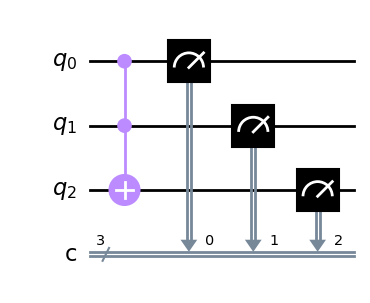

In [190]:
qc = QuantumCircuit(3, 3)
qc.ccx(0, 1, 2)
qc.measure(range(3), range(3))
qc.draw('mpl')

{'000': 1024}


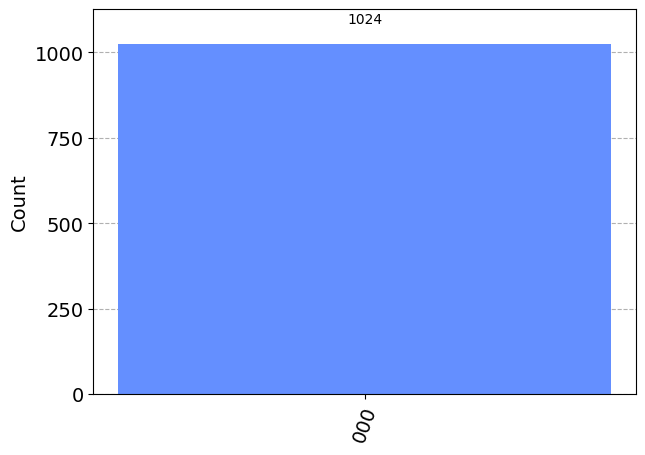

In [192]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(data=counts)